# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [30]:
import requests
import numpy as np

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [31]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [32]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [33]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <scrip


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [34]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt9140554">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt9140554/">
    <img alt="Loki" class="loadlate" data-tconst="tt9140554" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNTkwOTE1ZDYtODQ3Yy00YTYwLTg0YWQtYmVkNmFjNGZlYmRiXkEyXkFqcGdeQXVyNTc4MjczMTM@._V1_UX67_CR0,0,67,98_AL_.jp


In [35]:
content = table.find_all("div", attrs={'class':'lister-item-content'})

Finding row length.

In [36]:
row_length = len(content)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)

In [37]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    
    # Titles
    titles = content[i].find('a').text
        
    # Ratings and Metascores
    imdb_ratings = content[i].find('strong')
    if imdb_ratings is not None:
        imdb_ratings = imdb_ratings.text
    else: imdb_ratings = np.nan
    imdb_metascores = content[i].find('span', attrs={'class':'metascore mixed'})
    if imdb_metascores is not None:
        imdb_metascores = imdb_metascores.text
    else: imdb_metascores = np.nan
    
    # Votes
    imdb_votes = content[i].find('span', attrs={'name':'nv'})
    if imdb_votes is not None:
        imdb_votes = imdb_votes.text.replace(',','')
    else: imdb_votes = np.nan
    
    temp.append((titles, imdb_ratings, imdb_metascores, imdb_votes))
    
temp 

[('Loki', '8.9', nan, '75733'),
 ('The Tomorrow War', '6.7', '45        ', '82212'),
 ('Sex/Life', '5.5', nan, '6848'),
 ('F9', '5.5', '58        ', '29455'),
 ('The Many Saints of Newark', nan, nan, nan),
 ('Luca', '7.5', nan, '57845'),
 ('Fear Street: 1994', '6.2', nan, '22627'),
 ('The Ice Road', '5.5', '42        ', '14506'),
 ('No Sudden Move', '6.6', nan, '9287'),
 ('Black Widow', '7.0', nan, '63087'),
 ('In the Heights', '7.5', nan, '25906'),
 ('Cruella', '7.4', '59        ', '89407'),
 ('Mare of Easttown', '8.5', nan, '70561'),
 ('Sweet Tooth', '8.0', nan, '30973'),
 ('Good on Paper', '5.6', '54        ', '6307'),
 ('X-Ray: Selected Satyajit Shorts', '7.4', nan, '5788'),
 ('Raya and the Last Dragon', '7.4', nan, '93745'),
 ('Fatherhood', '6.7', '53        ', '20916'),
 ('Jolt', nan, nan, nan),
 ('The Suicide Squad', nan, nan, nan),
 ('The Mysterious Benedict Society', '7.7', nan, '846'),
 ('Nobody', '7.4', nan, '120156'),
 ("Hitman's Wife's Bodyguard", '6.3', nan, '13847'),
 ('

## Creating data frame & Data wrangling

Put the array into dataframe

In [38]:
import pandas as pd

df = pd.DataFrame(temp, columns=['Title', 'Rating', 'Metascore', 'Votes'])
df.head()

,Title,Rating,Metascore,Votes
0,Loki,8.9,NaN,75733
1,The Tomorrow War,6.7,45,82212
2,Sex/Life,5.5,NaN,6848
3,F9,5.5,58,29455
4,The Many Saints of Newark,NaN,NaN,NaN


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [39]:
df.dtypes

Title        object
Rating       object
Metascore    object
Votes        object
dtype: object

In [40]:
df[['Rating', 'Metascore', 'Votes']] = df[['Rating', 'Metascore', 'Votes']].astype('float64')
df['Votes'] = df['Votes']/10000
df['Metascore'] = df['Metascore']/10
# df = df.fillna(method='ffill').fillna(method='bfill')
df = df.fillna(0)

In [41]:
df.head()

,Title,Rating,Metascore,Votes
0,Loki,8.9,0.0,7.5733
1,The Tomorrow War,6.7,4.5,8.2212
2,Sex/Life,5.5,0.0,0.6848
3,F9,5.5,5.8,2.9455
4,The Many Saints of Newark,0.0,0.0,0.0000


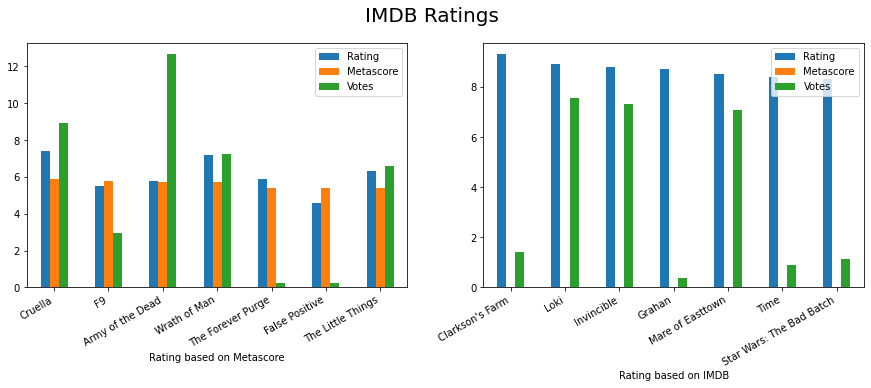

In [42]:
# Observation of top 7 data based on metascore and votes rating
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
df.set_index('Title').sort_values('Metascore', ascending=False).head(7).plot.bar(ax=plt.gca(), xlabel='Rating based on Metascore')
plt.subplot(1,2,2)
df.set_index('Title').sort_values('Rating', ascending=False).head(7).plot.bar(ax=plt.gca(), xlabel='Rating based on IMDB')
fig.suptitle('IMDB Ratings', fontsize=20)
fig.autofmt_xdate()

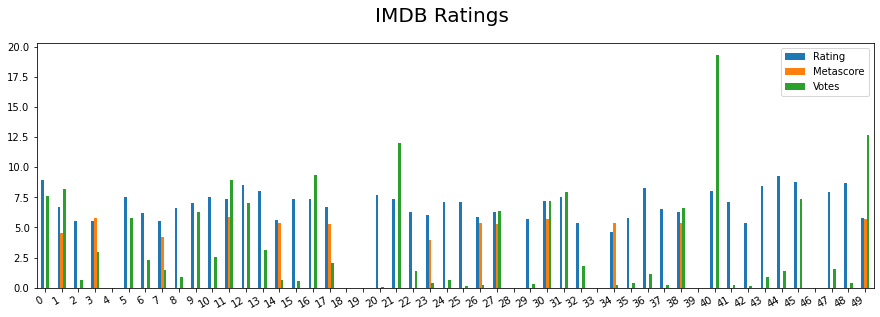

In [43]:
# Obsrvation of all data
fig = plt.figure(1, figsize=(15,5))
plt.subplot()
df.plot.bar(ax=plt.gca())
fig.suptitle('IMDB Ratings', fontsize=20)
fig.autofmt_xdate()

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

- Remove ',' inside the 'Votes' data before changing the datas into a dataframe
- Change the data type of column 'Rating', 'Metascore', and 'Votes' to float
- level the value of 'Metascore' and 'Votes' to around the value of 'Rating' so we plot the data
- fill in the blanks with 0

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

According to the processed data result scraped from the top 50 most popular searched film in IMDB, I take two different approaches. The first approach that I take was to obtain the top 7 film based on votes ratings, and the second approach was to obtain the top 7 film based on metascore ratings. The ratings which were taken from votes are the ratings which are generated based on the users willingness to take part in giving the film listed in IMDB, their point of view, of experiencing the film. The votes from the users will be automatically calculated to obtain the average value to be displayed in the website. The ratings which were generated from metascore are the ratings which are given by several professional critics in which the process of obtaining the ratings from metascore is through a wesite called metacritics. To generate the score, the website have to collect the reviews from various professional reviewers, summerized the reviews, and then convert the summarized reviews into a score. Do to this procedure, metascore ratings might take more time to be generated in the IMDB website than the ratings based on votes.

The two different approaches that I present in this notes is to find the difference between ratings method and to find whether both method have any corelation between each other. If we observed the bar chart, There are no title of the films present in both bar charts which shows no corelations between them. In the left bar chart, the ratings generated by votes tends to be more higher compare to the ratings generated from metascore. This might be due to public reviewers tends to stick to a genre or to a film with the same vibe as the last film that they watch compare to critics which has watch several different genres and give more unbiased opinion. Lastly, if we observed the bar chart on the right, we can see that all of the films does not prosess metascore ratings. However, if we observed further, most of the films in the list are mostly the newest release which probably the reason of why the metascore is no present.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.